# Handwritten digits recognition (using Multilayer Perceptron)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

![digits_recognition_mlp.png](../../demos/src/images/digits_recognition_mlp.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

2023-06-20 16:34:11.698621: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 16:34:11.719317: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 16:34:11.846496: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 16:34:11.847232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 16:34:12.490283: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Python version: 3.10.9
Tensorflow version: 2.12.0
Keras version: 2.12.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [31]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [32]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

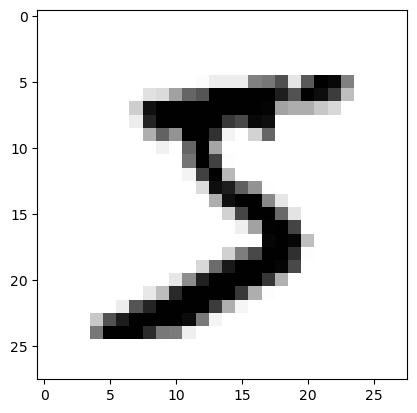

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

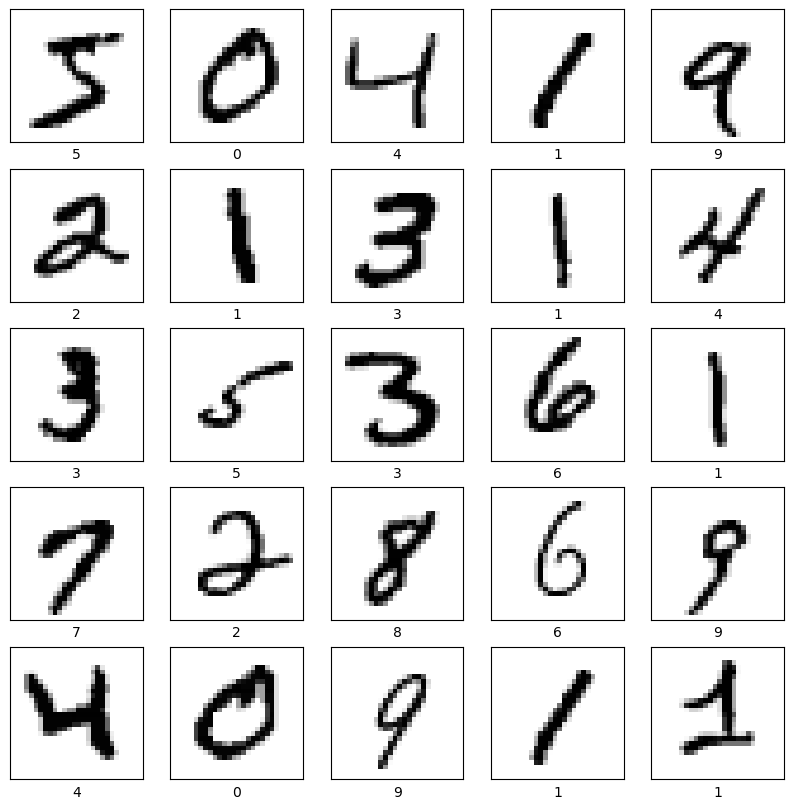

In [6]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [7]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [8]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

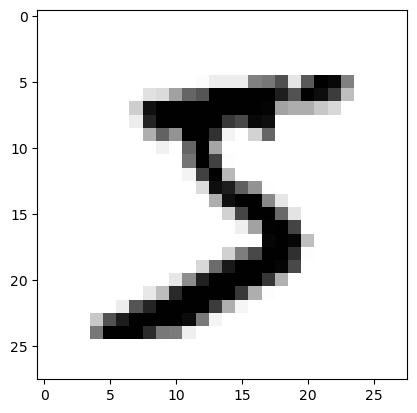

In [9]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).

In [10]:
x_train_normalized.shape[1:]

(28, 28)

In [11]:
# model = tf.keras.models.Sequential()

# # Input layers.
# model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
# model.add(tf.keras.layers.Dense(
#     units=128,
#     activation=tf.keras.activations.relu,
#     kernel_regularizer=tf.keras.regularizers.l2(0.002)
# ))

# # Hidden layers.
# model.add(tf.keras.layers.Dense(
#     units=128,
#     activation=tf.keras.activations.relu,
#     kernel_regularizer=tf.keras.regularizers.l2(0.002)
# ))

# # Output layers.
# model.add(tf.keras.layers.Dense(
#     units=10,
#     activation=tf.keras.activations.softmax
# ))

Here is our model summary so far.

In [12]:
# model.summary()

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [44]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:], name='flatten'))

# Hidden layers
model.add(tf.keras.layers.Dense(units=5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l2(0.002), name='dense1'))
model.add(tf.keras.layers.Dense(units=4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l2(0.002), name='dense2'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='output'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 5)                 3925      
                                                                 
 dense2 (Dense)              (None, 4)                 24        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 3,999
Trainable params: 3,999
Non-trainable params: 0
_________________________________________________________________


In [45]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile the model

In [46]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [47]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 2s 854us/step - loss: 1.2862 - accuracy: 0.5701 - val_loss: 0.8060 - val_accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.6819 - accuracy: 0.8356 - val_loss: 0.5647 - val_accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.5572 - accuracy: 0.8646 - val_loss: 0.5176 - val_accuracy: 0.8748
Epoch 4/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.5221 - accuracy: 0.8739 - val_loss: 0.4968 - val_accuracy: 0.8774
Epoch 5/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.5038 - accuracy: 0.8765 - val_loss: 0.4999 - val_accuracy: 0.8739
Epoch 6/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.4907 - accuracy: 0.8797 - val_loss: 0.4858 - val_accuracy: 0.8797
Epoch 7/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.4811 - accuracy: 0.8829 - val_loss: 0.4696 -

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

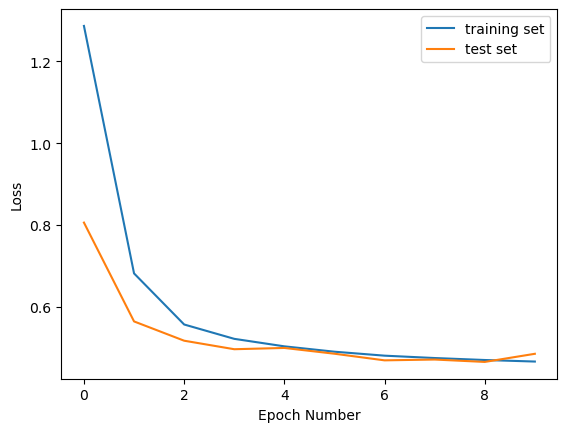

In [48]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

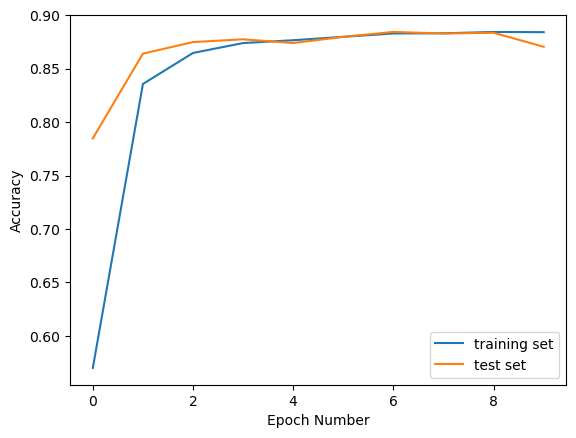

In [49]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [50]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [51]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.4900374710559845
Training accuracy:  0.8713833093643188


### Test set accuracy

In [52]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [53]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.4856210947036743
Validation accuracy:  0.8704000115394592


In [ ]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [54]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='model')
print("-----------------------------------")
print("Configuration")
# plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='model_1/hls4ml_prj', part='xczu7ev-ffvc1156-2-e'
)

Interpreting Sequential
Topology:
Layer name: flatten_input, layer type: InputLayer, input shapes: [[None, 28, 28]], output shape: [None, 28, 28]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 28, 28]], output shape: [None, 784]
Layer name: dense1, layer type: Dense, input shapes: [[None, 784]], output shape: [None, 5]
Layer name: dense2, layer type: Dense, input shapes: [[None, 5]], output shape: [None, 4]
Layer name: output, layer type: Dense, input shapes: [[None, 4]], output shape: [None, 10]
-----------------------------------
Configuration
-----------------------------------
Interpreting Sequential
Topology:
Layer name: flatten_input, layer type: InputLayer, input shapes: [[None, 28, 28]], output shape: [None, 28, 28]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 28, 28]], output shape: [None, 784]
Layer name: dense1, layer type: Dense, input shapes: [[None, 784]], output shape: [None, 5]
Layer name: dense2, layer type: Dense, input shapes: [[No

In [55]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [56]:
print("-------------------------Start--------------------------")
hls_model.compile()
X_test = np.ascontiguousarray(x_test_normalized)
y_hls = hls_model.predict(X_test)
print("--------------------------End-------------------------")
print("compilation done")

-------------------------Start--------------------------
Writing HLS project
Done
--------------------------End-------------------------
compilation done


In [57]:
!pip show hls4ml

Name: hls4ml
Version: 0.7.1
Summary: Machine learning in FPGAs using HLS
Home-page: https://fastmachinelearning.org/hls4ml
Author: hls4ml Team
Author-email: 
License: Apache-2.0
Location: /home/ayush/.local/lib/python3.10/site-packages
Requires: calmjs.parse, h5py, numpy, onnx, pydigitalwavetools, pyyaml, qkeras, six, tabulate
Required-by: 


In [58]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/ayush/vivado_2019/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/ayush/vivado_2019/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'ayush' on host 'binodssd' (Linux_x86_64 version 5.19.0-45-generic) on Sun Jan 20 16:42:36 IST 2019
INFO: [HLS 200-10] On os Ubuntu 22.04.2 LTS
INFO: [HLS 200-10] In directory '/home/ayush/lasthls4ml/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Addin

INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::softmax_stable<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, softmax_config8>' (firmware/nnet_utils/nnet_activation.h:217:46).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config7>' (firmware/nnet_utils/nnet_dense_latency.h:17:48).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config6>' (firmware/nnet_utils/nnet_activation.h:40:43).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config5>' (firmware/nnet_utils/nnet_dense_latency.h:17:48).
INFO: [XFORM 203

INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'exp_res.V' (firmware/nnet_utils/nnet_activation.h:249) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b7.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b5.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 c

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config3>'(firmware/nnet_utils/nnet_dense_latency.h:26:27) to 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config3>.0' by setting 'weights.V' to 'w3.V'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config3>.0'(firmware/nnet_utils/nnet_dense_latency.h:26:27) to 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config3>.0.0' by setting 'biases[0].V' to 'b3.V.0'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config3>.0.0'(firmware/nnet_utils/nnet_dense_latency.h:26:

INFO: [SCHED 204-61] Pipelining function 'dense_latency<ap_fixed,ap_fixed<16,6,5,3,0>,config3>.0.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 237.56 seconds; current allocated memory: 448.867 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 88.92 seconds; current allocated memory: 512.910 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_relu_config4_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
IN

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'myproject' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'myproject'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 3, Depth = 19.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.57 seconds; current allocated memory: 525.967 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 7.5 seconds; current allocated memory: 537.974 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generati

INFO: [Synth 8-638] synthesizing module 'myproject' [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:45]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:61]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:64]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:74]
INFO: [Synth 8-5534] Detected attribute (* fsm_encoding = "none" *) [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:103]
INFO: [Synth 8-3491] module 'dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0' declared at '/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/dense_latency_ap_fixed_a

INFO: [Synth 8-256] done synthesizing module 'myproject' (15#1) [/home/ayush/lasthls4ml/model_1/hls4ml_prj/myproject_prj/solution1/syn/vhdl/myproject.vhd:45]
---------------------------------------------------------------------------------
Finished Synthesize : Time (s): cpu = 00:00:12 ; elapsed = 00:00:13 . Memory (MB): peak = 2066.957 ; gain = 549.738 ; free physical = 4594 ; free virtual = 104799
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Constraint Validation : Time (s): cpu = 00:00:13 ; elapsed = 00:00:14 . Memory (MB): peak = 2066.957 ; gain = 549.738 ; free physical = 4646 ; free virtual = 104851
---------------------------------------------------------------------------------
INFO: [Synth 8-5580] Multithreading enabled for synth_design using a maximum of 4 processes.
INFO: [Synth 8-7031] Trying to map ROM "mem0" into Block RAM due to explicit "ram_st

No constraint files found.
---------------------------------------------------------------------------------
Start Cross Boundary and Area Optimization
---------------------------------------------------------------------------------
DSP Report: Generating DSP mul_ln1118_115_fu_7345_p2, operation Mode is: A2*(B:0x3ff86).
DSP Report: register mul_ln1118_115_fu_7345_p2 is absorbed into DSP mul_ln1118_115_fu_7345_p2.
DSP Report: operator mul_ln1118_115_fu_7345_p2 is absorbed into DSP mul_ln1118_115_fu_7345_p2.
DSP Report: Generating DSP mul_ln1118_116_fu_4732_p2, operation Mode is: A2*(B:0x3ff67).
DSP Report: register mul_ln1118_116_fu_4732_p2 is absorbed into DSP mul_ln1118_116_fu_4732_p2.
DSP Report: operator mul_ln1118_116_fu_4732_p2 is absorbed into DSP mul_ln1118_116_fu_4732_p2.
DSP Report: Generating DSP mul_ln1118_1717_fu_5847_p2, operation Mode is: A2*(B:0x6a).
DSP Report: register mul_ln1118_1717_fu_5847_p2 is absorbed into DSP mul_ln1118_1717_fu_5847_p2.
DSP Report: operator mul

DSP Report: Generating DSP mul_ln1118_601_fu_6563_p2, operation Mode is: A2*(B:0x3ffea).
DSP Report: register mul_ln1118_601_fu_6563_p2 is absorbed into DSP mul_ln1118_601_fu_6563_p2.
DSP Report: operator mul_ln1118_601_fu_6563_p2 is absorbed into DSP mul_ln1118_601_fu_6563_p2.
DSP Report: Generating DSP mul_ln1118_604_fu_6906_p2, operation Mode is: A2*(B:0x3ffa8).
DSP Report: register mul_ln1118_604_fu_6906_p2 is absorbed into DSP mul_ln1118_604_fu_6906_p2.
DSP Report: operator mul_ln1118_604_fu_6906_p2 is absorbed into DSP mul_ln1118_604_fu_6906_p2.
DSP Report: Generating DSP mul_ln1118_1432_fu_7025_p2, operation Mode is: A2*(B:0x3ff7d).
DSP Report: register mul_ln1118_1432_fu_7025_p2 is absorbed into DSP mul_ln1118_1432_fu_7025_p2.
DSP Report: operator mul_ln1118_1432_fu_7025_p2 is absorbed into DSP mul_ln1118_1432_fu_7025_p2.
DSP Report: Generating DSP mul_ln1118_1436_fu_7540_p2, operation Mode is: A2*(B:0x3ffb5).
DSP Report: register mul_ln1118_1436_fu_7540_p2 is absorbed into DSP

DSP Report: Generating DSP mul_ln1118_1387_fu_7619_p2, operation Mode is: A2*(B:0x3ffc3).
DSP Report: register mul_ln1118_1386_fu_6311_p2 is absorbed into DSP mul_ln1118_1387_fu_7619_p2.
DSP Report: operator mul_ln1118_1387_fu_7619_p2 is absorbed into DSP mul_ln1118_1387_fu_7619_p2.
DSP Report: Generating DSP mul_ln1118_1379_fu_6304_p2, operation Mode is: A2*(B:0x3ffb5).
DSP Report: register mul_ln1118_1379_fu_6304_p2 is absorbed into DSP mul_ln1118_1379_fu_6304_p2.
DSP Report: operator mul_ln1118_1379_fu_6304_p2 is absorbed into DSP mul_ln1118_1379_fu_6304_p2.
DSP Report: Generating DSP mul_ln1118_1384_fu_5002_p2, operation Mode is: A2*(B:0x3ffc7).
DSP Report: register mul_ln1118_1384_fu_5002_p2 is absorbed into DSP mul_ln1118_1384_fu_5002_p2.
DSP Report: operator mul_ln1118_1384_fu_5002_p2 is absorbed into DSP mul_ln1118_1384_fu_5002_p2.
DSP Report: Generating DSP mul_ln1118_1439_fu_5520_p2, operation Mode is: A2*(B:0x13).
DSP Report: register mul_ln1118_1439_fu_5520_p2 is absorbed i

DSP Report: Generating DSP mul_ln1118_1495_fu_5545_p2, operation Mode is: A2*(B:0x61).
DSP Report: register mul_ln1118_1497_fu_5547_p2 is absorbed into DSP mul_ln1118_1495_fu_5545_p2.
DSP Report: operator mul_ln1118_1495_fu_5545_p2 is absorbed into DSP mul_ln1118_1495_fu_5545_p2.
DSP Report: Generating DSP mul_ln1118_1420_fu_3924_p2, operation Mode is: A2*(B:0x49).
DSP Report: register mul_ln1118_1420_fu_3924_p2 is absorbed into DSP mul_ln1118_1420_fu_3924_p2.
DSP Report: operator mul_ln1118_1420_fu_3924_p2 is absorbed into DSP mul_ln1118_1420_fu_3924_p2.
DSP Report: Generating DSP mul_ln1118_1618_fu_7015_p2, operation Mode is: A2*(B:0x16).
DSP Report: register mul_ln1118_1618_fu_7015_p2 is absorbed into DSP mul_ln1118_1618_fu_7015_p2.
DSP Report: operator mul_ln1118_1618_fu_7015_p2 is absorbed into DSP mul_ln1118_1618_fu_7015_p2.
DSP Report: Generating DSP mul_ln1118_1649_fu_5974_p2, operation Mode is: A2*(B:0x3ffad).
DSP Report: register mul_ln1118_1649_fu_5974_p2 is absorbed into DS

DSP Report: Generating DSP mul_ln1118_1043_fu_6586_p2, operation Mode is: A2*(B:0x3ffc7).
DSP Report: register mul_ln1118_1043_fu_6586_p2 is absorbed into DSP mul_ln1118_1043_fu_6586_p2.
DSP Report: operator mul_ln1118_1043_fu_6586_p2 is absorbed into DSP mul_ln1118_1043_fu_6586_p2.
DSP Report: Generating DSP mul_ln1118_1047_fu_7562_p2, operation Mode is: A2*(B:0x3ff67).
DSP Report: register mul_ln1118_1047_fu_7562_p2 is absorbed into DSP mul_ln1118_1047_fu_7562_p2.
DSP Report: operator mul_ln1118_1047_fu_7562_p2 is absorbed into DSP mul_ln1118_1047_fu_7562_p2.
DSP Report: Generating DSP mul_ln1118_1051_fu_5080_p2, operation Mode is: A2*(B:0x3ff8f).
DSP Report: register mul_ln1118_1051_fu_5080_p2 is absorbed into DSP mul_ln1118_1051_fu_5080_p2.
DSP Report: operator mul_ln1118_1051_fu_5080_p2 is absorbed into DSP mul_ln1118_1051_fu_5080_p2.
DSP Report: Generating DSP mul_ln1118_1052_fu_5252_p2, operation Mode is: A2*(B:0x2b).
DSP Report: register mul_ln1118_1054_fu_4962_p2 is absorbed i

DSP Report: Generating DSP mul_ln1118_1005_fu_6725_p2, operation Mode is: A2*(B:0x3ff8e).
DSP Report: register mul_ln1118_1005_fu_6725_p2 is absorbed into DSP mul_ln1118_1005_fu_6725_p2.
DSP Report: operator mul_ln1118_1005_fu_6725_p2 is absorbed into DSP mul_ln1118_1005_fu_6725_p2.
DSP Report: Generating DSP mul_ln1118_990_fu_6710_p2, operation Mode is: A2*(B:0x3ffa1).
DSP Report: register mul_ln1118_990_fu_6710_p2 is absorbed into DSP mul_ln1118_990_fu_6710_p2.
DSP Report: operator mul_ln1118_990_fu_6710_p2 is absorbed into DSP mul_ln1118_990_fu_6710_p2.
DSP Report: Generating DSP mul_ln1118_1000_fu_7635_p2, operation Mode is: A2*(B:0x3ff85).
DSP Report: register mul_ln1118_1000_fu_7635_p2 is absorbed into DSP mul_ln1118_1000_fu_7635_p2.
DSP Report: operator mul_ln1118_1000_fu_7635_p2 is absorbed into DSP mul_ln1118_1000_fu_7635_p2.
DSP Report: Generating DSP mul_ln1118_995_fu_5408_p2, operation Mode is: A2*(B:0x3ff76).
DSP Report: register mul_ln1118_995_fu_5408_p2 is absorbed into 

DSP Report: Generating DSP mul_ln1118_352_fu_4474_p2, operation Mode is: A2*(B:0x2a).
DSP Report: register mul_ln1118_352_fu_4474_p2 is absorbed into DSP mul_ln1118_352_fu_4474_p2.
DSP Report: operator mul_ln1118_352_fu_4474_p2 is absorbed into DSP mul_ln1118_352_fu_4474_p2.
DSP Report: Generating DSP mul_ln1118_876_fu_3942_p2, operation Mode is: A2*(B:0x56).
DSP Report: register mul_ln1118_876_fu_3942_p2 is absorbed into DSP mul_ln1118_876_fu_3942_p2.
DSP Report: operator mul_ln1118_876_fu_3942_p2 is absorbed into DSP mul_ln1118_876_fu_3942_p2.
DSP Report: Generating DSP mul_ln1118_880_fu_3946_p2, operation Mode is: A2*(B:0x71).
DSP Report: register mul_ln1118_880_fu_3946_p2 is absorbed into DSP mul_ln1118_880_fu_3946_p2.
DSP Report: operator mul_ln1118_880_fu_3946_p2 is absorbed into DSP mul_ln1118_880_fu_3946_p2.
DSP Report: Generating DSP mul_ln1118_901_fu_6581_p2, operation Mode is: A2*(B:0x3ff85).
DSP Report: register mul_ln1118_901_fu_6581_p2 is absorbed into DSP mul_ln1118_901_

DSP Report: Generating DSP mul_ln1118_496_fu_6336_p2, operation Mode is: A2*(B:0x83).
DSP Report: register mul_ln1118_496_fu_6336_p2 is absorbed into DSP mul_ln1118_496_fu_6336_p2.
DSP Report: operator mul_ln1118_496_fu_6336_p2 is absorbed into DSP mul_ln1118_496_fu_6336_p2.
DSP Report: Generating DSP mul_ln1118_493_fu_7722_p2, operation Mode is: A2*(B:0x2a).
DSP Report: register mul_ln1118_496_fu_6336_p2 is absorbed into DSP mul_ln1118_493_fu_7722_p2.
DSP Report: operator mul_ln1118_493_fu_7722_p2 is absorbed into DSP mul_ln1118_493_fu_7722_p2.
DSP Report: Generating DSP mul_ln1118_488_fu_4211_p2, operation Mode is: A2*(B:0x32).
DSP Report: register mul_ln1118_488_fu_4211_p2 is absorbed into DSP mul_ln1118_488_fu_4211_p2.
DSP Report: operator mul_ln1118_488_fu_4211_p2 is absorbed into DSP mul_ln1118_488_fu_4211_p2.
DSP Report: Generating DSP mul_ln1118_482_fu_5254_p2, operation Mode is: A2*(B:0x8c).
DSP Report: register mul_ln1118_482_fu_5254_p2 is absorbed into DSP mul_ln1118_482_fu_

DSP Report: Generating DSP mul_ln1118_984_fu_6357_p2, operation Mode is: A2*(B:0x23).
DSP Report: register mul_ln1118_984_fu_6357_p2 is absorbed into DSP mul_ln1118_984_fu_6357_p2.
DSP Report: operator mul_ln1118_984_fu_6357_p2 is absorbed into DSP mul_ln1118_984_fu_6357_p2.
DSP Report: Generating DSP mul_ln1118_1514_fu_4680_p2, operation Mode is: A2*(B:0x3ffe6).
DSP Report: register mul_ln1118_1514_fu_4680_p2 is absorbed into DSP mul_ln1118_1514_fu_4680_p2.
DSP Report: operator mul_ln1118_1514_fu_4680_p2 is absorbed into DSP mul_ln1118_1514_fu_4680_p2.
DSP Report: Generating DSP mul_ln1118_373_fu_6414_p2, operation Mode is: A2*(B:0x15).
DSP Report: register mul_ln1118_373_fu_6414_p2 is absorbed into DSP mul_ln1118_373_fu_6414_p2.
DSP Report: operator mul_ln1118_373_fu_6414_p2 is absorbed into DSP mul_ln1118_373_fu_6414_p2.
DSP Report: Generating DSP mul_ln1118_897_fu_3963_p2, operation Mode is: A2*(B:0x3ff6b).
DSP Report: register mul_ln1118_897_fu_3963_p2 is absorbed into DSP mul_ln1

---------------------------------------------------------------------------------
Start ROM, RAM, DSP and Shift Register Reporting
---------------------------------------------------------------------------------

DSP: Preliminary Mapping	Report (see note below)
+-------------------------------------------------------------------------+-------------------+--------+--------+--------+--------+--------+------+------+------+------+-------+------+------+
|Module Name                                                              | DSP Mapping       | A Size | B Size | C Size | D Size | P Size | AREG | BREG | CREG | DREG | ADREG | MREG | PREG | 
+-------------------------------------------------------------------------+-------------------+--------+--------+--------+--------+--------+------+------+------+------+-------+------+------+
|dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0           | A2*(B:0x3ff86)    | 16     | 8      | -      | -      | 24     | 1    | 0    | -    | -


Report RTL Partitions: 
+------+---------------------------------------------------------------------+------------+----------+
|      |RTL Partition                                                        |Replication |Instances |
+------+---------------------------------------------------------------------+------------+----------+
|1     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB0  |           1|     24922|
|2     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB1  |           1|      3493|
|3     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB2  |           1|      2354|
|4     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB3  |           1|      4043|
|5     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB4  |           1|      6863|
|6     |dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config3_0_0_0_0_0_0__GB5  |           1|      8102|
|7     |dense_latency_ap_fixed_ap_fixed_16_6_5_3

---------------------------------------------------------------------------------
Start IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Final Netlist Cleanup
---------------------------------------------------------------------------------
INFO: [Synth 8-7053] The timing for the instance grp_softmax_stable_ap_fixed_ap_fixed_16_6_5_3_0_softmax_config8_s_fu_144/q0_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be m

Synthesis Optimization Runtime : Time (s): cpu = 00:01:48 ; elapsed = 00:01:47 . Memory (MB): peak = 3317.754 ; gain = 1800.535 ; free physical = 5641 ; free virtual = 105228
Synthesis Optimization Complete : Time (s): cpu = 00:01:48 ; elapsed = 00:01:47 . Memory (MB): peak = 3317.754 ; gain = 1800.535 ; free physical = 5651 ; free virtual = 105227
INFO: [Project 1-571] Translating synthesized netlist
Netlist sorting complete. Time (s): cpu = 00:00:01 ; elapsed = 00:00:01 . Memory (MB): peak = 3317.754 ; gain = 0.000 ; free physical = 5465 ; free virtual = 105058
INFO: [Netlist 29-17] Analyzing 20841 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 7 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
INFO: [Opt 31-422] The CLOCK_DOMAINS attribute on the BRAM cell grp_softmax_stable_ap_fixed_ap_fixed_16_6_5_3_0_softmax_config8_s_fu_144/q0_reg has been changed from IN

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.277',
  'BestLatency': '18',
  'WorstLatency': '18',
  'IntervalMin': '3',
  'IntervalMax': '3',
  'BRAM_18K': '3',
  'DSP': '1741',
  'FF': '39429',
  'LUT': '108383',
  'URAM': '0',
  'AvailableBRAM_18K': '624',
  'AvailableDSP': '1728',
  'AvailableFF': '460800',
  'AvailableLUT': '230400',
  'AvailableURAM': '96'},
 'VivadoSynthReport': {'LUT': '64356',
  'FF': '34753',
  'BRAM_18K': '1.5',
  'URAM': '0',
  'DSP48E': '1697'}}

In [59]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Sun Jan 20 16:50:00 2019

* Version:        2019.2 (Build 2704478 on Wed Nov 06 22:10:23 MST 2019)
* Project:        myproject_prj
* Solution:       solution1
* Product family: zynquplus
* Target device:  xczu7ev-ffvc1156-2-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  | 5.00 ns | 4.277 ns |   0.62 ns  |
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+-----------+-----------+-----+-----+----------+
    |  Latency (cycles) |   Latency (absolute)  |  Interval | Pipeline |
    |   min   |   max   |    min    |    max    | min | max |   Type   |
    +---------+---------+-----